In [2]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time
import matplotlib.pyplot as plt

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 110, resize = 0.4)

In [5]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [8]:
lfw.images.shape

(1031, 50, 37)

In [10]:
lfw.data.shape

(1031, 1850)

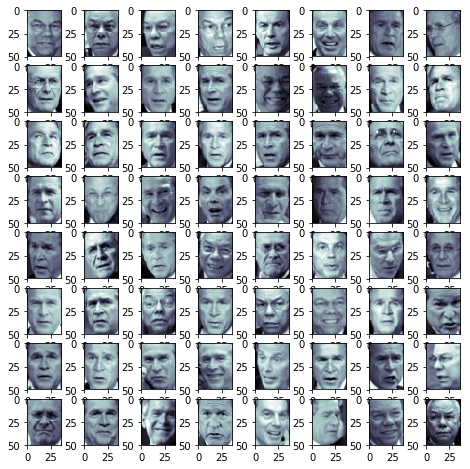

In [12]:
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap = plt.cm.bone)
    
plt.show()

In [50]:
pca = PCA()
x_train, x_test, y_train, y_test = train_test_split(lfw.data,lfw.target,random_state = 1, test_size = 0.25)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
k = 0
currentSumVariance = 0
total = sum(pca.explained_variance_)

while currentSumVariance/total < 0.98:
    currentSumVariance += pca.explained_variance_[k]
    k = k+1
    
k

225

In [17]:
pca1 = PCA(n_components = k, whiten = True)
x_train_pca = pca1.fit_transform(x_train)
x_test_pca = pca1.transform(x_test)

# Checking Accuracy and time taken with various classifiers

# Random Forest 

In [24]:
# Without pca
rf = RandomForestClassifier(random_state = 1)
start = time.time()
rf.fit(x_train,y_train)
print("Time :", time.time()-start)
y_pred = rf.predict(x_test)
print("Score : ",rf.score(x_test,y_test))
print()

# Note the biasing towards 3rd column 15,9,119,16
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 0.2637653350830078
Score :  0.740310077519

             precision    recall  f1-score   support

          0       0.77      0.72      0.75        69
          1       0.44      0.38      0.41        21
          2       0.75      0.90      0.82       132
          3       0.88      0.39      0.54        36

avg / total       0.75      0.74      0.73       258

[[ 50   4  15   0]
 [  2   8   9   2]
 [  9   4 119   0]
 [  4   2  16  14]]


In [27]:
# With PCA
rf = RandomForestClassifier(random_state = 1)
start = time.time()
rf.fit(x_train_pca,y_train)
print("Time :", time.time()-start)
y_pred = rf.predict(x_test_pca)
print("Score : ",rf.score(x_test_pca,y_test))
print()

# Note the biasing towards 3rd column 38,13,113,26
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 0.12675046920776367
Score :  0.573643410853

             precision    recall  f1-score   support

          0       0.57      0.39      0.47        69
          1       0.23      0.14      0.18        21
          2       0.59      0.86      0.70       132
          3       0.62      0.14      0.23        36

avg / total       0.56      0.57      0.53       258

[[ 27   3  38   1]
 [  4   3  13   1]
 [ 12   6 113   1]
 [  4   1  26   5]]


Result of Rf:
    with pca : less score, improved speed, lesser precion and recall

# SVM Classifier

In [31]:
# Without pca
svm1 = svm.SVC()
start = time.time()
svm1.fit(x_train,y_train)
print("Time :", time.time()-start)
y_pred = svm1.predict(x_test)
print("Score : ",svm1.score(x_test,y_test))
print()

# Very poor behaviour classifies everything as class 3 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 3.3859915733337402
Score :  0.511627906977

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        69
          1       0.00      0.00      0.00        21
          2       0.51      1.00      0.68       132
          3       0.00      0.00      0.00        36

avg / total       0.26      0.51      0.35       258

[[  0   0  69   0]
 [  0   0  21   0]
 [  0   0 132   0]
 [  0   0  36   0]]


/home/ash/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
# With PCA
svm1 = svm.SVC()
start = time.time()
svm1.fit(x_train_pca,y_train)
print("Time :", time.time()-start)
y_pred = svm1.predict(x_test_pca)
print("Score : ",svm1.score(x_test_pca,y_test))
print()

# Behaves better with PCA analysis
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 0.44460058212280273
Score :  0.81007751938

             precision    recall  f1-score   support

          0       1.00      0.74      0.85        69
          1       1.00      0.29      0.44        21
          2       0.73      1.00      0.84       132
          3       1.00      0.56      0.71        36

avg / total       0.86      0.81      0.79       258

[[ 51   0  18   0]
 [  0   6  15   0]
 [  0   0 132   0]
 [  0   0  16  20]]


# Multinomial NB

In [36]:
multi = MultinomialNB()
# without PCA
start = time.time()
multi.fit(x_train,y_train)
print("Time :", time.time()-start)
y_pred = multi.predict(x_test)
print("Score : ",multi.score(x_test,y_test))
print()

 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 0.011842727661132812
Score :  0.744186046512

             precision    recall  f1-score   support

          0       0.78      0.57      0.66        69
          1       0.52      0.67      0.58        21
          2       0.79      0.80      0.79       132
          3       0.72      0.92      0.80        36

avg / total       0.75      0.74      0.74       258

[[ 39   2  23   5]
 [  1  14   3   3]
 [ 10  11 106   5]
 [  0   0   3  33]]


In [44]:
# With PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(lfw.data)
x = scaler.transform(lfw.data)

x_train_pca, x_test_pca, y_train, y_test = train_test_split(x,lfw.target,random_state = 1, test_size = 0.25)
multi = MultinomialNB()
start = time.time()

multi.fit(x_train_pca,y_train)
print("Time :", time.time()-start)
y_pred = multi.predict(x_test_pca)
print("Score : ",multi.score(x_test_pca,y_test))
print()

# Behaves better with PCA analysis
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

ValueError: Input X must be non-negative

# Decision Tree

In [48]:
# Without pca
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(x_train,y_train)
print("Time :", time.time()-start)
y_pred = dt.predict(x_test)
print("Score : ",dt.score(x_test,y_test))
print()

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 1.519083023071289
Score :  0.600775193798

             precision    recall  f1-score   support

          0       0.64      0.57      0.60        69
          1       0.24      0.29      0.26        21
          2       0.72      0.76      0.74       132
          3       0.30      0.28      0.29        36

avg / total       0.60      0.60      0.60       258

[[ 39   7  17   6]
 [  5   6   4   6]
 [ 14   7 100  11]
 [  3   5  18  10]]


In [51]:
# With pca
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(x_train_pca,y_train)
print("Time :", time.time()-start)
y_pred = dt.predict(x_test_pca)
print("Score : ",dt.score(x_test_pca,y_test))
print()

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 1.5132482051849365
Score :  0.600775193798

             precision    recall  f1-score   support

          0       0.59      0.57      0.58        69
          1       0.25      0.24      0.24        21
          2       0.74      0.77      0.75       132
          3       0.28      0.28      0.28        36

avg / total       0.60      0.60      0.60       258

[[ 39   3  16  11]
 [  9   5   5   2]
 [ 11   7 101  13]
 [  7   5  14  10]]
